# Complete Model Development (CRISP - DM)

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np

### Step 1: Importing inital dataset

In [2]:
df = pd.read_excel("cricketChrips_Temperature.xls")

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df = df.rename(columns = {"X":"chirps","Y":"Temperature"})
df

,chirps,Temperature
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


### Step 2: Exploratory data analysis

In [4]:
df.shape

(15, 2)

In [5]:
columns_list = df.columns.to_list()
pd.DataFrame(columns_list, columns = ["Column Names"])

,Column Names
0,chirps
1,Temperature


#### Checking for missing values

In [6]:
df.isna().sum()

chirps         0
Temperature    0
dtype: int64

### **No missing values in our dataset**

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chirps       15 non-null     float64
 1   Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


#### Step 2.1 Univariate Statistics (https://www.statology.org/univariate-analysis-in-python/)

There are three common ways to perform univariate analysis on one variable:

1. General Information – data type, Measures the center , spread of values, frequency count/no of unique values
2. Charts – Used to visualize the distribution of values.


In [8]:
#########################
#  Summary statistics   #
#########################

# 1.1 -- calculate mean of 'quality'
print(f"Mean : {df['chirps'].mean()}")

# 1.2 -- calculate median of 'quality' 
print(f"Median : {df['chirps'].median()}") 

# 1.3 -- calculate variance of 'quality'
print(f"Variance: {(df['chirps'].std())**2}")

# 1.4 -- calculate standard deviation of 'quality'
print(f"Standard Deviation: {df['chirps'].std()}")

# 1.5 -- calculate range for 'quality'

print(f"Range: {max(df['chirps']) - min(df['chirps'])}")

# 1. -- create frequency table for 'quality'

pd.DataFrame(df['chirps'].value_counts())



Mean : 16.653333345999997
Median : 16.20000076
Variance: 2.89695224650494
Standard Deviation: 1.7020435501199551
Range: 5.600000380000001


,chirps
17.100000,2
16.000000,2
17.200001,1
14.400000,1
14.700000,1
15.400000,1
16.200001,1
19.799999,1
18.400000,1
17.000000,1


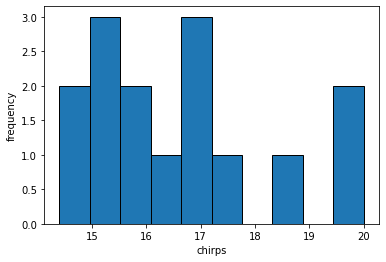

In [9]:

#########################
# 3. Charts             #
#########################

# Histogram

import matplotlib.pyplot as plt

plt.hist(df["chirps"],edgecolor='black') ;
plt.xlabel("chirps") ;
plt.ylabel("frequency") ;

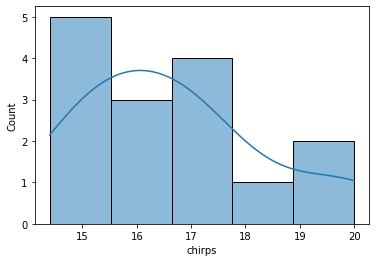

In [10]:
# Density Curve

import seaborn as sns

sns.histplot(df['chirps'], kde = True) ;

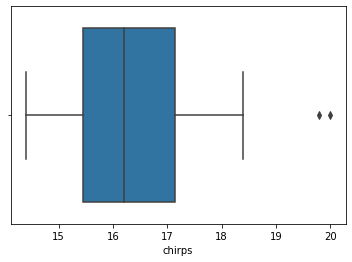

In [11]:
sns.boxplot(data=df, x='chirps');

In [14]:
df[["chirps","Temperature"]].corr()

,chirps,Temperature
chirps,1.000000,0.835144
Temperature,0.835144,1.000000


In [15]:
x = df[["Temperature"]]
y = df["chirps"]

# Regression line has to go through centroid

x_mean = x.mean().to_list()
x_mean = x_mean[0]

y_mean = y.mean()


print(f"centroid :{x_mean,y_mean}")



centroid = [x_mean,y_mean]

centroid :(80.03999989666664, 16.653333345999997)


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x,y)

In [17]:
# correlation coefficient , 𝑅
import math
r = math.sqrt(model.score(x,y))

print(f"correlation coefficient [𝑅]: {r}")

# coefficient of determination, 𝑅²
r_sq = model.score(x, y)

print(f"coefficient of determination [𝑅²]: {r_sq}")

correlation coefficient [𝑅]: 0.8351437870311553
coefficient of determination [𝑅²]: 0.6974651450167397


- in this case relationship is strong , it displays a strong linear relationship  = [𝑅]: 0.8351437870311553

- the proportion of variance in the dependent variable (y) that can be explained by the independent variable (x) is = [𝑅²]: 0.6974651450167397

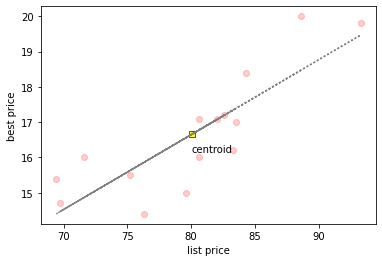

In [18]:
import matplotlib.pyplot as plt

plt.scatter(x, y,color='red', alpha=0.2)
plt.plot(x, model.predict(x),color='grey',linestyle = ":")
plt.scatter(centroid[0],centroid[1],color = "yellow", edgecolors="red", marker = "s")
plt.text(centroid[0],centroid[1]-0.5, "centroid", color="black")
plt.xlabel("list price")
plt.ylabel("best price")
plt.show() 